In [1]:
#dependencies
from pathlib import Path
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from datetime import datetime


Main_csv_path = Path("Resources/18100205.csv")
Metadata_csv_path = Path("Resources/18100205_MetaData.csv")

Main_StatsCan_IndexDF = pd.read_csv(Main_csv_path, encoding="UTF-8-Sig")
Metadata_DF = pd.read_csv(Metadata_csv_path, encoding="UTF-8-Sig")

Main_StatsCan_IndexDF.tail()

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
61075,2023-05,"Vancouver, British Columbia",2011S0503933,House only,"Index, 201612=100",347,units,0,v111955557,39.2,126.4,NaN,NaN,NaN,1
61076,2023-05,"Vancouver, British Columbia",2011S0503933,Land only,"Index, 201612=100",347,units,0,v111955558,39.3,121.0,E,NaN,NaN,1
61077,2023-05,"Victoria, British Columbia",2011S0503935,Total (house and land),"Index, 201612=100",347,units,0,v111955559,40.1,121.9,NaN,NaN,NaN,1
61078,2023-05,"Victoria, British Columbia",2011S0503935,House only,"Index, 201612=100",347,units,0,v111955560,40.2,127.9,NaN,NaN,NaN,1
61079,2023-05,"Victoria, British Columbia",2011S0503935,Land only,"Index, 201612=100",347,units,0,v111955561,40.3,110.6,E,NaN,NaN,1


In [2]:
Metadata_DF.head()

,Cube Title,Product Id,CANSIM Id,URL,Cube Notes,Archive Status,Frequency,Start Reference Period,End Reference Period,Total number of dimensions
"New housing price index, monthly",18100205,327-0056,https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...,1;2;3;13;14,CURRENT - a cube available to the public and t...,Monthly,1981-01-01,2023-05-01,2.0,NaN
Dimension ID,Dimension name,Dimension Notes,Dimension Definitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,New housing price indexes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dimension ID,Member Name,Classification Code,Member ID,Parent Member ID,Terminated,Member Notes,Member Definitions,NaN,NaN,NaN


In [3]:
# Select necessary columns for initial data cleaning processes.

reduced_main_df = Main_StatsCan_IndexDF[["REF_DATE","GEO","New housing price indexes","UOM","VALUE","STATUS","DECIMALS"]]		
#reduced_main_df.head()

reduced_main_df.columns.values[2] = "NewHousePrice_Index_Type" #Replaced column name of "New housing price indexes".

reduced_main_df.tail()

,REF_DATE,GEO,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS
61075,2023-05,"Vancouver, British Columbia",House only,"Index, 201612=100",126.4,NaN,1
61076,2023-05,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.0,E,1
61077,2023-05,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",121.9,NaN,1
61078,2023-05,"Victoria, British Columbia",House only,"Index, 201612=100",127.9,NaN,1
61079,2023-05,"Victoria, British Columbia",Land only,"Index, 201612=100",110.6,E,1


In [4]:
#import re
#print(re.split(r',',reduced_main_df["GEO"]))
Orig_Geo_series = pd.Series(reduced_main_df["GEO"])
#print(Orig_Geo_series)
Geo_Split = Orig_Geo_series.str.split(',')

Geo_CityRow = Geo_Split.str.get(0) #access the first element for eventual "column1"

Geo_CityRow

0                 Canada
1                 Canada
2                 Canada
3        Atlantic Region
4        Atlantic Region
              ...       
61075          Vancouver
61076          Vancouver
61077           Victoria
61078           Victoria
61079           Victoria
Name: GEO, Length: 61080, dtype: object

In [5]:
Geo_ProvRow = Geo_Split.str.get(1) #access the first element for eventual "column2"

Geo_ProvRow

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
               ...        
61075     British Columbia
61076     British Columbia
61077     British Columbia
61078     British Columbia
61079     British Columbia
Name: GEO, Length: 61080, dtype: object

In [6]:
#Temp_DF = pd.concat(reduced_main_df,Geo_City )

Manual_Merge_Geo = pd.concat([Geo_CityRow,Geo_ProvRow], axis=1) #axis=1 is using "column 1" to merge.

Manual_Merge_Geo

#Rename Options presented via => https://www.geeksforgeeks.org/rename-specific-columns-in-pandas/
Manual_Merge_Geo.columns.values[0] = "City_Region"
Manual_Merge_Geo.columns.values[1] = "Province"

Manual_Merge_Geo

#BEST PRACTICE MIGHT BE TO RENAME RIGHT AWAY "HERE" ... to save coding time later.

,City_Region,Province
0,Canada,NaN
1,Canada,NaN
2,Canada,NaN
3,Atlantic Region,NaN
4,Atlantic Region,NaN
...,...,...
61075,Vancouver,British Columbia
61076,Vancouver,British Columbia
61077,Victoria,British Columbia
61078,Victoria,British Columbia


In [7]:
Orig_Year_series = pd.Series(reduced_main_df["REF_DATE"])
Year_Split = Orig_Year_series.str.split('-')

Row_Year = Year_Split.str.get(0) #access the first element for eventual "column1"

Row_Year

0        1981
1        1981
2        1981
3        1981
4        1981
         ... 
61075    2023
61076    2023
61077    2023
61078    2023
61079    2023
Name: REF_DATE, Length: 61080, dtype: object

In [8]:
Row_Month = Year_Split.str.get(1) #access the first element for eventual "column1"

Row_Month

0        01
1        01
2        01
3        01
4        01
         ..
61075    05
61076    05
61077    05
61078    05
61079    05
Name: REF_DATE, Length: 61080, dtype: object

In [9]:
Manual_Merge_date = pd.concat([Row_Year,Row_Month], axis=1) #axis=1 is using "column 1" to merge.

Manual_Merge_date

#Rename Options presented via => https://www.geeksforgeeks.org/rename-specific-columns-in-pandas/
Manual_Merge_date.columns.values[0] = "Year"
Manual_Merge_date.columns.values[1] = "Month"

Manual_Merge_date
#BEST PRACTICE MIGHT BE TO RENAME RIGHT AWAY "HERE" ... to save coding time later.
#KEY REMINDER ... if we need the month to be transformed into "1" intstead of "01" (IE: INT from TEXT/VARCHAR) ... here is probably the best place as well.

,Year,Month
0,1981,01
1,1981,01
2,1981,01
3,1981,01
4,1981,01
...,...,...
61075,2023,05
61076,2023,05
61077,2023,05
61078,2023,05


In [10]:
#via => https://appdividend.com/2020/06/02/pandas-concat-method-example-in-python/
#JOIN Split GEO Columns to Original DF

GeoUpdated_DF = pd.concat([reduced_main_df,Manual_Merge_Geo],axis=1,join='outer') # ,join_axes=None,ignore_index=False)

GeoUpdated_DF

#JOIN Split YEar+Month Columns to GeoUpdated_DF

DateUpdated_DF = pd.concat([GeoUpdated_DF,Manual_Merge_date],axis=1,join='outer')

DateUpdated_DF


,REF_DATE,GEO,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS,City_Region,Province,Year,Month
0,1981-01,Canada,Total (house and land),"Index, 201612=100",38.2,NaN,1,Canada,NaN,1981,01
1,1981-01,Canada,House only,"Index, 201612=100",36.1,NaN,1,Canada,NaN,1981,01
2,1981-01,Canada,Land only,"Index, 201612=100",40.6,E,1,Canada,NaN,1981,01
3,1981-01,Atlantic Region,Total (house and land),"Index, 201612=100",NaN,..,1,Atlantic Region,NaN,1981,01
4,1981-01,Atlantic Region,House only,"Index, 201612=100",NaN,..,1,Atlantic Region,NaN,1981,01
...,...,...,...,...,...,...,...,...,...,...,...
61075,2023-05,"Vancouver, British Columbia",House only,"Index, 201612=100",126.4,NaN,1,Vancouver,British Columbia,2023,05
61076,2023-05,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.0,E,1,Vancouver,British Columbia,2023,05
61077,2023-05,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",121.9,NaN,1,Victoria,British Columbia,2023,05
61078,2023-05,"Victoria, British Columbia",House only,"Index, 201612=100",127.9,NaN,1,Victoria,British Columbia,2023,05


In [11]:
#reduced_main_df = Main_StatsCan_IndexDF[["REF_DATE","GEO","New housing price indexes","UOM","VALUE","STATUS","DECIMALS"]]

Analysis_DF = DateUpdated_DF[["Year","Month","City_Region","Province","NewHousePrice_Index_Type","UOM","VALUE","STATUS","DECIMALS"]]

Analysis_DF

,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS
0,1981,01,Canada,NaN,Total (house and land),"Index, 201612=100",38.2,NaN,1
1,1981,01,Canada,NaN,House only,"Index, 201612=100",36.1,NaN,1
2,1981,01,Canada,NaN,Land only,"Index, 201612=100",40.6,E,1
3,1981,01,Atlantic Region,NaN,Total (house and land),"Index, 201612=100",NaN,..,1
4,1981,01,Atlantic Region,NaN,House only,"Index, 201612=100",NaN,..,1
...,...,...,...,...,...,...,...,...,...
61075,2023,05,Vancouver,British Columbia,House only,"Index, 201612=100",126.4,NaN,1
61076,2023,05,Vancouver,British Columbia,Land only,"Index, 201612=100",121.0,E,1
61077,2023,05,Victoria,British Columbia,Total (house and land),"Index, 201612=100",121.9,NaN,1
61078,2023,05,Victoria,British Columbia,House only,"Index, 201612=100",127.9,NaN,1


In [12]:
#Remove "junk data" columns based on StatsCan Legend.

StatusClean_Analysis_DF = Analysis_DF.query("STATUS not in ['E', 'x', '..']") # QUERY fuction delivers to python "memory" a "true/false" outcome.
TotalPriceIndex_Analysis_DF = StatusClean_Analysis_DF.query("NewHousePrice_Index_Type not in ['House only','']")
#StatusClean_Analysis_DF

TotalPriceIndex_Analysis_DF

,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS
0,1981,01,Canada,NaN,Total (house and land),"Index, 201612=100",38.2,NaN,1
9,1981,01,St. John's,Newfoundland and Labrador,Total (house and land),"Index, 201612=100",36.1,NaN,1
27,1981,01,Saint John,Fredericton,Total (house and land),"Index, 201612=100",55.9,NaN,1
33,1981,01,Québec,Quebec,Total (house and land),"Index, 201612=100",30.1,NaN,1
42,1981,01,Montréal,Quebec,Total (house and land),"Index, 201612=100",28.5,NaN,1
...,...,...,...,...,...,...,...,...,...
61065,2023,05,Edmonton,Alberta,Total (house and land),"Index, 201612=100",108.2,NaN,1
61068,2023,05,British Columbia,NaN,Total (house and land),"Index, 201612=100",127.0,NaN,1
61071,2023,05,Kelowna,British Columbia,Total (house and land),"Index, 201612=100",123.8,NaN,1
61074,2023,05,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",127.8,NaN,1


In [13]:
desired_cities = ['Toronto', 'Vancouver', 'Montréal']
filtered_city_data = {}

for city in desired_cities:
    city_filtered_df = TotalPriceIndex_Analysis_DF[TotalPriceIndex_Analysis_DF['City_Region'] == city]
    filtered_city_data[city] = city_filtered_df

# Print the data for all cities
for city, city_df in filtered_city_data.items():
    print(f"Data for {city}:")
    print(city_df)
    print("\n")

#Q from Ajani - 2023-07-24 - Are we confident that this is brining us all of the cities or is this the issue we discussed to look into validating? The validation was whether the code is producing all "cities" vs just the "last/first" one it finds in the list above.

#Solution1 Idea - 2023-07-24 - a NumPy Array may be necessary rather than a list. **OR** we create a Dictionary from the list ... with the Key being "City_Region" ... similar to our custom column rename above.


Data for Toronto:
       Year Month City_Region  Province NewHousePrice_Index_Type  \
57     1981    01     Toronto   Ontario   Total (house and land)   
177    1981    02     Toronto   Ontario   Total (house and land)   
297    1981    03     Toronto   Ontario   Total (house and land)   
417    1981    04     Toronto   Ontario   Total (house and land)   
537    1981    05     Toronto   Ontario   Total (house and land)   
...     ...   ...         ...       ...                      ...   
60537  2023    01     Toronto   Ontario   Total (house and land)   
60657  2023    02     Toronto   Ontario   Total (house and land)   
60777  2023    03     Toronto   Ontario   Total (house and land)   
60897  2023    04     Toronto   Ontario   Total (house and land)   
61017  2023    05     Toronto   Ontario   Total (house and land)   

                     UOM  VALUE STATUS  DECIMALS  
57     Index, 201612=100   28.0    NaN         1  
177    Index, 201612=100   28.5    NaN         1  
297    Index

In [14]:
#Extract sample data to validate that the STATUS not in funciton above was successful.
Output_Folder = 'Output/'
Output_file = Output_Folder + 'city_filtered_df.csv'

# Concatenate DataFrames for all cities
combined_data = pd.concat(filtered_city_data.values(), ignore_index=True)

#Q from Ajani ... we should look into this. It doesn't make sense for ignore_index=True here in my opinion. Very open to discussion. AO - 2023-07-24 => LOOKS like it created a new index.
#Q from Ajani ... are we sure all 3 cities are produced? Wondering if there's an iteration issue for Python/Pandas. Let's discuss at some point. AO - 2023-07-24

# Save the combined data to a single CSV file
combined_data.to_csv(Output_file, index=False, encoding='utf-8-sig') # ref for variation in export encoding https://stackoverflow.com/questions/57152985/what-is-the-difference-between-utf-8-and-utf-8-sig


In [15]:
Final_City_Filtered_DF = combined_data

Final_City_Filtered_DF

,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS
0,1981,01,Toronto,Ontario,Total (house and land),"Index, 201612=100",28.0,NaN,1
1,1981,02,Toronto,Ontario,Total (house and land),"Index, 201612=100",28.5,NaN,1
2,1981,03,Toronto,Ontario,Total (house and land),"Index, 201612=100",29.8,NaN,1
3,1981,04,Toronto,Ontario,Total (house and land),"Index, 201612=100",31.2,NaN,1
4,1981,05,Toronto,Ontario,Total (house and land),"Index, 201612=100",32.3,NaN,1
...,...,...,...,...,...,...,...,...,...
1522,2023,01,Montréal,Quebec,Total (house and land),"Index, 201612=100",151.7,NaN,1
1523,2023,02,Montréal,Quebec,Total (house and land),"Index, 201612=100",151.7,NaN,1
1524,2023,03,Montréal,Quebec,Total (house and land),"Index, 201612=100",151.7,NaN,1
1525,2023,04,Montréal,Quebec,Total (house and land),"Index, 201612=100",152.5,NaN,1


In [16]:
Housing_Prices_by_year = Path("Resources/Housing_Prices_by_year.csv")
Housing_Prices_by_year_df = pd.read_csv(Housing_Prices_by_year, encoding="UTF-8-Sig")

Housing_Prices_by_year_df

,month_Year,Vancouver,Toronto,Montreal
0,2012-01-01,"660,600","420,950","284,000"
1,2012-02-01,"670,900","456,537",NaN
2,2012-03-01,"679,000","450,750",NaN
3,2012-04-01,"683,800","464,075",NaN
4,2012-05-01,"625,100","472,839",NaN
...,...,...,...,...
127,2022-08-01,"1,180,500","939,625","523,700"
128,2022-09-01,"1,155,300","957,500","511,400"
129,2022-10-01,"1,148,900","964,125","504,800"
130,2022-11-01,"1,131,600","964,125","501,000"


In [17]:
#Validating which DataTypes are within the .csv of our new Housing Price DataSet.

Housing_Prices_by_year_df.dtypes

month_Year    object
Vancouver     object
Toronto       object
Montreal      object
dtype: object

In [18]:
#Rename columns for code error appearing associated to "Vancouver" (Likely a "text trim")  issue.

Housing_Prices_by_year_df.columns.values[1] = "Vancouver"
Housing_Prices_by_year_df.columns.values[2] = "Toronto"
Housing_Prices_by_year_df.columns.values[3] = "Montreal"

#print(Housing_Prices_by_year_df)


In [19]:
#Validating the Structure of the data from the .csv as Date Format input from "user" (the csv data set) to Python's/Panda's processing needs.
#Panda's processing needs can be observed here via URL => 

Housing_Prices_by_year_df['month_Year']

0      2012-01-01
1      2012-02-01
2      2012-03-01
3      2012-04-01
4      2012-05-01
          ...    
127    2022-08-01
128    2022-09-01
129    2022-10-01
130    2022-11-01
131    2022-12-01
Name: month_Year, Length: 132, dtype: object

In [20]:
#1 => Goal of next step is to "establish" a column being similar to StatsCan original data of "YYYY-MM".
#2 => We will use the following URL to establish what our "format=" parameter code has to be ... based on OUR USER INPUT DATA (IE: the .csv.) URL => https://www.w3schools.com/python/python_datetime.asp

pd.to_datetime(Housing_Prices_by_year_df['month_Year'], format='%Y-%m-%d', errors = 'coerce')

#SUCCESS ... (comment on the "why" to the team ... we are being "literal coders here" ... to produce the "date as a parameter" ... the params are "Y/M/D" ... and Python does it using the "to_datetime functions ... parameter that is called "format=" ... format='%Y-%m-%d' )
#For the "pd.to_datetime function ... the params are as follows.... (1 = you column to be processed/iterated over ... 2 = the format WITHIN that column ... 3 = what to do when the column you've targeted "doesn't fit" ... int the FORMAT you confirmed is the "data structure" for all entries. IE: basically we've developed an "#N/A" type output similar to an Excel "vlookup" ... but for dates in PYTHON ....)"

0     2012-01-01
1     2012-02-01
2     2012-03-01
3     2012-04-01
4     2012-05-01
         ...    
127   2022-08-01
128   2022-09-01
129   2022-10-01
130   2022-11-01
131   2022-12-01
Name: month_Year, Length: 132, dtype: datetime64[ns]

In [21]:
#Next we have a "four stepper" as per our initial work above.
# This block is dedicated to "step #1" of repeating the pd.concat() approach above.
# pd.series() is CRITICAL for our "expected" output and data frame to "join to" ... the original ".csv" for us to then delete the "bad data" ... 
#
#Step #1 - 1> Orig_Geo_series = pd.Series(reduced_main_df["GEO"]) ... sets up "index" to match original dataset.
#Step #2 - 1> Geo_Split = Orig_Geo_series.str.split(',') ... splits up the "data" into our desired output.
#2 - 2> Geo_CityRow = Geo_Split.str.get(0) #access the first element for eventual "column1" ... sets up "variables" ... for renaming.
#2 - 3> Geo_CityRow ... Call's the row for "validation" ... 
#Step #3 - 1> DateUpdated_DF = pd.concat([GeoUpdated_DF,Manual_Merge_date],axis=1,join='outer')
#3 - 2> DateUpdated_DF ... Call's "merged data" for "validation" ...
#Step 4 - 1> #Manual_Merge_date.columns.values[0] = "Year" ... Renames the column outputs merged into new DF ... to "desired for presentation" naming convention.

#Pseudo code "Step 1" ... break the "user data" (the .csv) column into 3 parameters ...

Orig_HP_DateTime_To_Date = pd.Series(
     pd.to_datetime(Housing_Prices_by_year_df['month_Year'], format='%Y-%m-%d', errors = 'coerce').dt.strftime('%Y-%m-%d')
)

Orig_HP_DateTime_To_Date 


0      2012-01-01
1      2012-02-01
2      2012-03-01
3      2012-04-01
4      2012-05-01
          ...    
127    2022-08-01
128    2022-09-01
129    2022-10-01
130    2022-11-01
131    2022-12-01
Name: month_Year, Length: 132, dtype: object

In [22]:
#This cell is executing Step #2 above.

HP_Month_Year_DF = Orig_HP_DateTime_To_Date.str.split('-')

HP_Year_Row = HP_Month_Year_DF.str.get(0) #access the first element for eventual "column1"
HP_Month_Row = HP_Month_Year_DF.str.get(1) #access the 2nd element for eventual "column2"
HP_Day_Row = HP_Month_Year_DF.str.get(2) #access the 3rd element for eventual "column3"

print(HP_Year_Row)
print(HP_Month_Row)
print(HP_Day_Row)


#Orig_HP_DateSeries = pd.Series(
#    pd.to_datetime(Housing_Prices_by_year_df['month_Year'], format='%Y-%m-%d', errors = 'coerce')
#    )
#NOTE: I split the code above just for discussion on the SYNTAX with the team (it can be set back to one line after).
#NOTE2: the following between the "<>" failed ... because I need to convert to STRING ... to PARSE ... via the Python "str.split" function ... <HP_Split_DF =  Orig_HP_DateSeries.str.split('-')>
#NOTE3: ACTUALLY NO ... the following is "just a trim" ... we DON'T WANT THAT - Eventually we want "lstrip" via URL => https://www.tutsmake.com/python-trim-left-or-right-string/
#NOTE3: NEW APPROACH  via URL => https://www.statology.org/pandas-convert-datetime-to-string/

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
127    2022
128    2022
129    2022
130    2022
131    2022
Name: month_Year, Length: 132, dtype: object
0      01
1      02
2      03
3      04
4      05
       ..
127    08
128    09
129    10
130    11
131    12
Name: month_Year, Length: 132, dtype: object
0      01
1      01
2      01
3      01
4      01
       ..
127    01
128    01
129    01
130    01
131    01
Name: month_Year, Length: 132, dtype: object


In [23]:
#This cell is executing Step #3 & #4 above

Manual_Merge_HP_Date =  pd.concat([HP_Year_Row,HP_Month_Row,HP_Day_Row], axis=1)
#Manual_Merge_HP_Date
Manual_Merge_HP_Date.columns.values[0] = "HousePrice_Year"
Manual_Merge_HP_Date.columns.values[1] = "HousePrice_Month"
Manual_Merge_HP_Date.columns.values[2] = "HousePrice_Day"

Manual_Merge_HP_Date

#EXAMPLE Code Reference from above.
#Manual_Merge_date = pd.concat([Row_Year,Row_Month], axis=1) #axis=1 is using "column 1" to merge.
#Manual_Merge_date
#Rename Options presented via => https://www.geeksforgeeks.org/rename-specific-columns-in-pandas/
#Manual_Merge_date.columns.values[0] = "Year"
#Manual_Merge_date.columns.values[1] = "Month"
#Manual_Merge_date
#BEST PRACTICE MIGHT BE TO RENAME RIGHT AWAY "HERE" ... to save coding time later.

,HousePrice_Year,HousePrice_Month,HousePrice_Day
0,2012,01,01
1,2012,02,01
2,2012,03,01
3,2012,04,01
4,2012,05,01
...,...,...,...
127,2022,08,01
128,2022,09,01
129,2022,10,01
130,2022,11,01


In [24]:
#This cell is merging back into the Original .csv "user data" and also removing columns no longer needed.
#Purpose = to prepare to merge to the "master Analysis data sheet" on a city by city basis.

Updated_HP_by_Year_DF = pd.concat([Housing_Prices_by_year_df,Manual_Merge_HP_Date], axis=1,join='outer')
#Updated_HP_by_Year_DF

Van_Analysis_HP_by_Year_DF = Updated_HP_by_Year_DF[["HousePrice_Year","HousePrice_Month","HousePrice_Day","Vancouver"]] #,"Montreal","Toronto"]]
Van_Analysis_HP_by_Year_DF["City"] = "Vancouver"
Van_Analysis_HP_by_Year_DF.rename(columns={"Vancouver":"AvgHousePrice"},inplace=True)
Van_Analysis_HP_by_Year_DF.head()


#Step1>EXAMPLE CODE from earlier in the Notebook:
#GeoUpdated_DF = pd.concat([reduced_main_df,Manual_Merge_Geo],axis=1,join='outer') # ,join_axes=None,ignore_index=False)
#GeoUpdated_DF
#Step2>EXAMPLE CODE from earlier:
#Analysis_DF = DateUpdated_DF[["Year","Month","City_Region","Province","NewHousePrice_Index_Type","UOM","VALUE","STATUS","DECIMALS"]]
#Analysis_DF

C:\Users\64724\AppData\Local\Temp\ipykernel_8492\1954260171.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Van_Analysis_HP_by_Year_DF["City"] = "Vancouver"
C:\Users\64724\AppData\Local\Temp\ipykernel_8492\1954260171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Van_Analysis_HP_by_Year_DF.rename(columns={"Vancouver":"AvgHousePrice"},inplace=True)


,HousePrice_Year,HousePrice_Month,HousePrice_Day,AvgHousePrice,City
0,2012,01,01,"660,600",Vancouver
1,2012,02,01,"670,900",Vancouver
2,2012,03,01,"679,000",Vancouver
3,2012,04,01,"683,800",Vancouver
4,2012,05,01,"625,100",Vancouver


In [25]:
#Same as above for Montreal. KEY NOTE not cleaning this data (IE: "nulls/NaN") until we get into the Master Data Set.

Mtl_Analysis_HP_by_Year_DF = Updated_HP_by_Year_DF[["HousePrice_Year","HousePrice_Month","HousePrice_Day","Montreal"]] #,"Vancouver","Montreal","Toronto"]]
Mtl_Analysis_HP_by_Year_DF["City"] = "Montreal"
Mtl_Analysis_HP_by_Year_DF.rename(columns={"Montreal":"AvgHousePrice"},inplace=True)
Mtl_Analysis_HP_by_Year_DF.head()

C:\Users\64724\AppData\Local\Temp\ipykernel_8492\1014680221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mtl_Analysis_HP_by_Year_DF["City"] = "Montreal"
C:\Users\64724\AppData\Local\Temp\ipykernel_8492\1014680221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mtl_Analysis_HP_by_Year_DF.rename(columns={"Montreal":"AvgHousePrice"},inplace=True)


,HousePrice_Year,HousePrice_Month,HousePrice_Day,AvgHousePrice,City
0,2012,01,01,"284,000",Montreal
1,2012,02,01,NaN,Montreal
2,2012,03,01,NaN,Montreal
3,2012,04,01,NaN,Montreal
4,2012,05,01,NaN,Montreal


In [26]:
#Same as above for Montreal. KEY NOTE not cleaning this data (IE: "nulls/NaN") until we get into the Master Data Set.

Tor_Analysis_HP_by_Year_DF = Updated_HP_by_Year_DF[["HousePrice_Year","HousePrice_Month","HousePrice_Day","Toronto"]] #,"Vancouver","Montreal","Toronto"]]
Tor_Analysis_HP_by_Year_DF["City"] = "Toronto"
Tor_Analysis_HP_by_Year_DF.rename(columns={"Toronto":"AvgHousePrice"},inplace=True)
Tor_Analysis_HP_by_Year_DF.head()

# Add "City_Regiom"

C:\Users\64724\AppData\Local\Temp\ipykernel_8492\1457380441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tor_Analysis_HP_by_Year_DF["City"] = "Toronto"
C:\Users\64724\AppData\Local\Temp\ipykernel_8492\1457380441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tor_Analysis_HP_by_Year_DF.rename(columns={"Toronto":"AvgHousePrice"},inplace=True)


,HousePrice_Year,HousePrice_Month,HousePrice_Day,AvgHousePrice,City
0,2012,01,01,"420,950",Toronto
1,2012,02,01,"456,537",Toronto
2,2012,03,01,"450,750",Toronto
3,2012,04,01,"464,075",Toronto
4,2012,05,01,"472,839",Toronto


In [27]:
#Total_Analysis_HP_by_Year_DF = Updated_HP_by_Year_DF[["HousePrice_Year","HousePrice_Month","HousePrice_Day","Vancouver","Toronto","Montreal"]]
#Total_Analysis_HP_by_Year_DF

avg_hp_df = pd.concat([Tor_Analysis_HP_by_Year_DF,Van_Analysis_HP_by_Year_DF,Mtl_Analysis_HP_by_Year_DF])
avg_hp_df.head()

,HousePrice_Year,HousePrice_Month,HousePrice_Day,AvgHousePrice,City
0,2012,01,01,"420,950",Toronto
1,2012,02,01,"456,537",Toronto
2,2012,03,01,"450,750",Toronto
3,2012,04,01,"464,075",Toronto
4,2012,05,01,"472,839",Toronto


In [28]:
#Creating a test cell for the "if + elif" row ... as For (?) LOOP to populate a data frame. I'm not 100% certain the cells above are executing 100% of everything we need.

HP_to_Final_City_Filtered_DF = pd.merge( Final_City_Filtered_DF ,avg_hp_df, how='left',
left_on=['Year','Month'], right_on=['HousePrice_Year','HousePrice_Month'])

HP_to_Final_City_Filtered_DF


#Van_Analysis_HP_by_Year_DF
#Mtl_Analysis_HP_by_Year_DF
#Tor_Analysis_HP_by_Year_DF


,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS,HousePrice_Year,HousePrice_Month,HousePrice_Day,AvgHousePrice,City
0,1981,01,Toronto,Ontario,Total (house and land),"Index, 201612=100",28.0,NaN,1,NaN,NaN,NaN,NaN,NaN
1,1981,02,Toronto,Ontario,Total (house and land),"Index, 201612=100",28.5,NaN,1,NaN,NaN,NaN,NaN,NaN
2,1981,03,Toronto,Ontario,Total (house and land),"Index, 201612=100",29.8,NaN,1,NaN,NaN,NaN,NaN,NaN
3,1981,04,Toronto,Ontario,Total (house and land),"Index, 201612=100",31.2,NaN,1,NaN,NaN,NaN,NaN,NaN
4,1981,05,Toronto,Ontario,Total (house and land),"Index, 201612=100",32.3,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,2023,01,Montréal,Quebec,Total (house and land),"Index, 201612=100",151.7,NaN,1,NaN,NaN,NaN,NaN,NaN
2315,2023,02,Montréal,Quebec,Total (house and land),"Index, 201612=100",151.7,NaN,1,NaN,NaN,NaN,NaN,NaN
2316,2023,03,Montréal,Quebec,Total (house and land),"Index, 201612=100",151.7,NaN,1,NaN,NaN,NaN,NaN,NaN
2317,2023,04,Montréal,Quebec,Total (house and land),"Index, 201612=100",152.5,NaN,1,NaN,NaN,NaN,NaN,NaN


In [29]:
RIGHT_to_Final_City_Filtered_DF = pd.merge( Final_City_Filtered_DF ,avg_hp_df, how='inner',
left_on=['Year','Month',"City_Region"], right_on=['HousePrice_Year','HousePrice_Month',"City"])

RIGHT_to_Final_City_Filtered_DF

,Year,Month,City_Region,Province,NewHousePrice_Index_Type,UOM,VALUE,STATUS,DECIMALS,HousePrice_Year,HousePrice_Month,HousePrice_Day,AvgHousePrice,City
0,2012,01,Toronto,Ontario,Total (house and land),"Index, 201612=100",82.4,NaN,1,2012,01,01,"420,950",Toronto
1,2012,02,Toronto,Ontario,Total (house and land),"Index, 201612=100",82.7,NaN,1,2012,02,01,"456,537",Toronto
2,2012,03,Toronto,Ontario,Total (house and land),"Index, 201612=100",83.2,NaN,1,2012,03,01,"450,750",Toronto
3,2012,04,Toronto,Ontario,Total (house and land),"Index, 201612=100",83.5,NaN,1,2012,04,01,"464,075",Toronto
4,2012,05,Toronto,Ontario,Total (house and land),"Index, 201612=100",84.0,NaN,1,2012,05,01,"472,839",Toronto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2022,08,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",129.4,NaN,1,2022,08,01,"1,180,500",Vancouver
260,2022,09,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",129.4,NaN,1,2022,09,01,"1,155,300",Vancouver
261,2022,10,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",128.4,NaN,1,2022,10,01,"1,148,900",Vancouver
262,2022,11,Vancouver,British Columbia,Total (house and land),"Index, 201612=100",128.2,NaN,1,2022,11,01,"1,131,600",Vancouver


In [30]:
#Extract sample data to validate that the STATUS not in funciton above was successful.
Output_Folder = 'Output/'
Output_file = Output_Folder + 'HP_to_Final_City_Filtered_DF.csv'

# Save the combined data to a single CSV file
HP_to_Final_City_Filtered_DF.to_csv(Output_file, index=False, encoding='utf-8-sig') # ref for variation in export encoding https://stackoverflow.com/questions/57152985/what-is-the-difference-between-utf-8-and-utf-8-sig

In [31]:
#Extract sample data to validate that the STATUS not in funciton above was successful.
Output_Folder = 'Output/'
Output_file = Output_Folder + 'RIGHT_to_Final_City_Filtered_DF.csv'

# Save the combined data to a single CSV file
RIGHT_to_Final_City_Filtered_DF.to_csv(Output_file, index=False, encoding='utf-8-sig') # ref for variation in export encoding https://stackoverflow.com/questions/57152985/what-is-the-difference-between-utf-8-and-utf-8-sig

In [32]:
#SET UP the basepoints for the calculation with historical prices ...
#Create VARs to enable them to run against the cleaned data set ...

#Determine how to complete the analysis ... and fit into how they can be placed into slides.

#Confirm the types of "plots" ... we're confident in to speak to the story of the data analysis we're able to produce.
#Remember to comment that our $ costs are "approximations" ... due to needing the baseprice assumptions.

In [33]:
#Slides Notes:
#Maria is testing


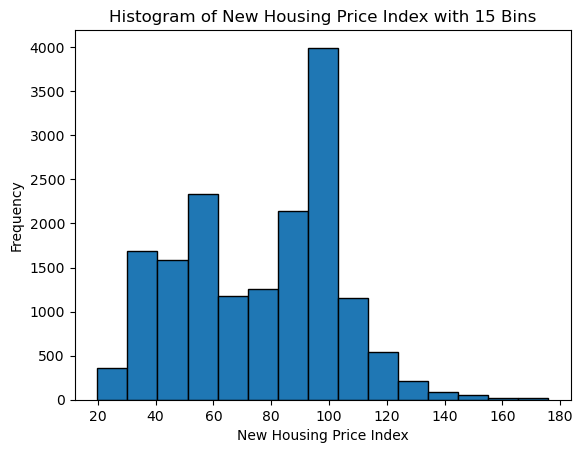

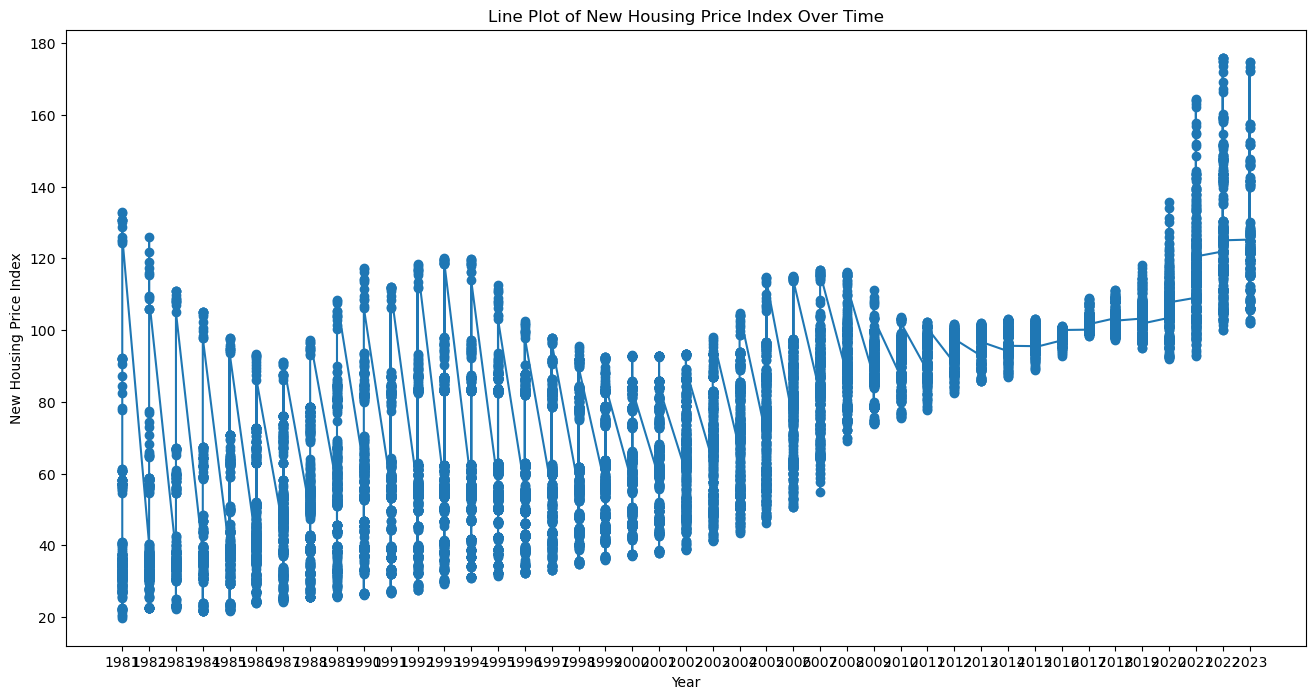

NameError: name 'covid_data' is not defined

In [42]:
# #box and whisker plot

# # #Extract the 'VALUE' column for the histogram
# housing_price_index_values = TotalPriceIndex_Analysis_DF['VALUE']

# #Plot the histogram with 15 bins
# plt.hist(housing_price_index_values, bins=15, edgecolor='black')

# #Add labels and title
# plt.xlabel('New Housing Price Index')
# plt.ylabel('Frequency')
# plt.title('Histogram of New Housing Price Index with 15 Bins')

# #Display the histogram
# plt.show() 
# #--------------------------------------------------------------------

# #line plot
# # # Extract the 'Year' and 'VALUE' columns for the line plot
# years = TotalPriceIndex_Analysis_DF['Year']
# housing_price_index_values = TotalPriceIndex_Analysis_DF['VALUE']

# plt.figure(figsize=(16,8))

# # Plot the line plot
# plt.plot(years, housing_price_index_values, marker='o', linestyle='-')


# # # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('New Housing Price Index')
# plt.title('Line Plot of New Housing Price Index Over Time')

# # Display the line plot
# plt.show()

# #--------------------------------------------------------------------
# # Extract the relevant columns for the bubble plot
# housing_price_index_values = TotalPriceIndex_Analysis_DF['VALUE']
# years = TotalPriceIndex_Analysis_DF['Year']
# demand_changes = covid_data['Demand_Changes']  # Replace 'Demand_Changes' with the actual column name

# # Calculate bubble sizes based on the demand_changes variable (you can use any other variable of interest)
# bubble_sizes = demand_changes * 100  # Adjust the multiplier to control bubble size

# # Create the bubble plot
# plt.figure(figsize=(10, 6))
# plt.scatter(years, housing_price_index_values, s=bubble_sizes, alpha=0.7, c='blue')

# # Add labels and title
# plt.xlabel('Year')
# plt.ylabel('New Housing Price Index')
# plt.title('Bubble Plot of New Housing Price Index Over Time with Demand Changes')

# # Display the bubble plot
# plt.show()